#### What is Parkinson's Disease<br>

Parkinson's disease is a type of disorder of our central nervous system. This disorder the movement of a person. <br>
Damage of nerve cells in the brain lead to this disease. Other symptoms are posture imbalance, slow movement and tremor- rhythmic shaking of body parts. <br>

This diesase can last for years, or life long as well. Treatment can help, but cannot cure this disorder. People usually develop this disease around 60 years age or older. <br>

#### What is the dataset about<br>

The dataset is composed of a range of biomedical voice measurements from 31 people, 23 of them have Parkinson's disease. Each column of the table is a voice mesure and there are a total of 195 measurements gathered in the dataset.

Attributes Explanation:

name - Subject name and Recording number<br>
MDVP:Fo(Hz) - Average vocal fundamental frequency<br>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency<br>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency<br>
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency<br>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude<br>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice<br>
status - Health status of the subject (one) - Parkinson's, (zero) - healthy<br>
RPDE,D2 - Two nonlinear dynamical complexity measures<br>
DFA - Signal fractal scaling exponent<br>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation<br>

Link to dataset: http://archive.ics.uci.edu/ml/datasets/Parkinsons/about.html <br>


#### Main aim / Problem Statement<br>

The aim of the data is to classify healthy people and people having parkinson's disease, according to the 'status' column which indicates 0 for healthy person and 1 for person having parkinson.

### Importing necessary Libraries and Data

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing data

df = pd.read_csv("parkinsons.data", sep=",")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# Getting column names
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
# Getting general description of count, mean, standard deviation. maximum value for each column
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
# Getting data type of each column
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

We have almost all float values, except the name column which we will be removing later, as it has no relevance to be considered in our machine learning model. <br>
Status column is an int value, which is our target variable, our model will predict the value of this column.

In [6]:
# Checking whether there are any NULL values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

As we can see, there are no NULL or NA values, so there is no need for any null treatment on our data. <br>
All 195 instance values of each column are present in the data.

### Performing EDA (Exploratory Data Anaysis)

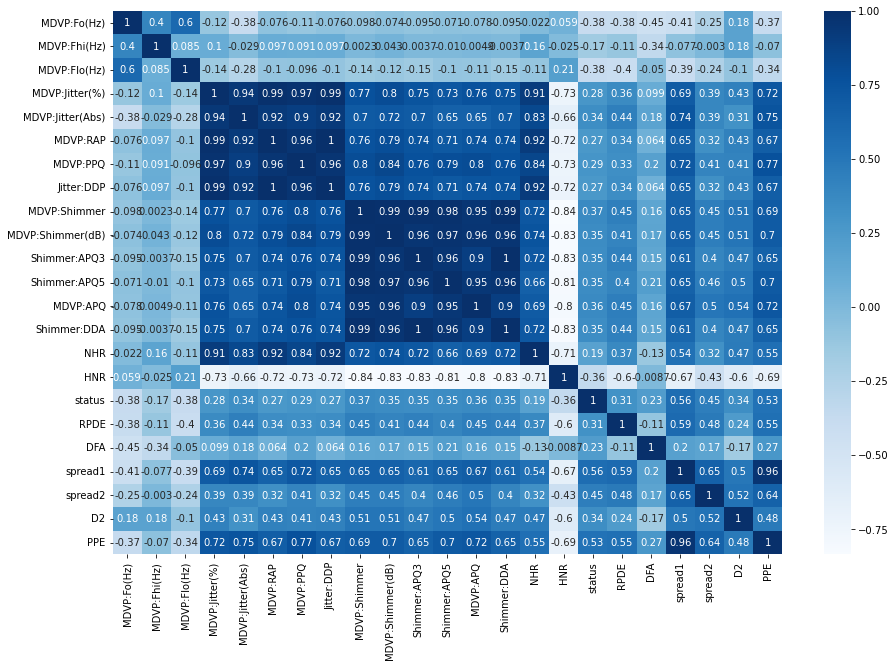

In [7]:
#Using Pearson Correlation
"""The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation"""

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

<AxesSubplot:xlabel='status', ylabel='count'>

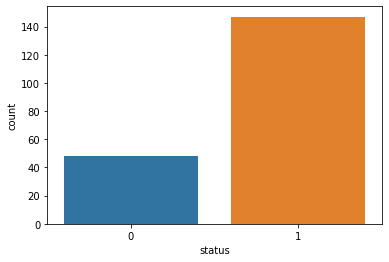

In [8]:
# Getting ditribution of target variable 'status'
sns.countplot(x=df["status"])

As per above countplot, there are more values of 1s than 0s. Taking a guess at the distribution, approximately 75% of the values are 1, and remaining being 0. <br>
Meaning, we have more data of people having parkinson's compared to normal people.

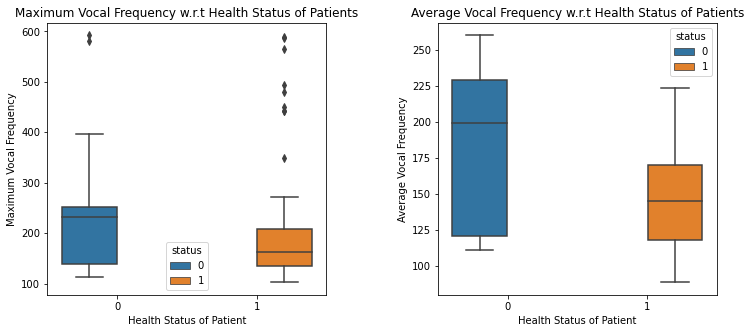

In [9]:
# Visualizing box plots of certain features w.r.t target

fig, ax = plt.subplots(2, 2, figsize=(12,5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(y='MDVP:Fhi(Hz)', x='status',data=df, hue='status')
plt.xlabel('Health Status of Patient')
plt.ylabel('Maximum Vocal Frequency')
plt.title("Maximum Vocal Frequency w.r.t Health Status of Patients")

plt.subplot(1,2,2)
sns.boxplot(y='MDVP:Fo(Hz)', x='status',data=df, hue='status')
plt.xlabel('Health Status of Patient')
plt.ylabel('Average Vocal Frequency')
plt.title("Average Vocal Frequency w.r.t Health Status of Patients")

plt.show()

Looking at the above box plot, there are certain amount of outliers in the weakly correlated column: MDVP:Fhi (Maximum Vocal Frequency) compared to moderate-correlated column: MDVP:Fo (Average Vocal Frequency).

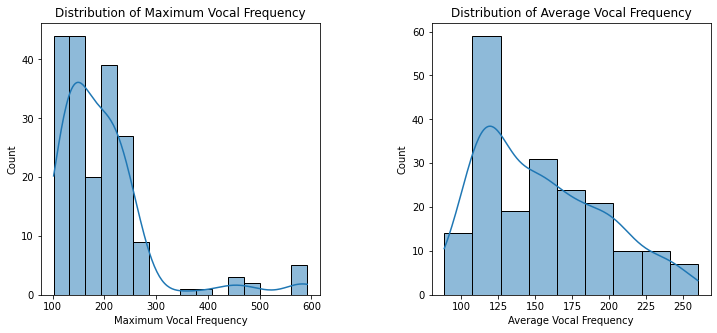

In [10]:
# Visualizing distribution of features using histplot

fig, ax = plt.subplots(2, 2, figsize=(12,5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(1,2,1)
sns.histplot(df['MDVP:Fhi(Hz)'], kde=True)
plt.xlabel('Maximum Vocal Frequency')
plt.title("Distribution of Maximum Vocal Frequency")

plt.subplot(1,2,2)
sns.histplot(df['MDVP:Fo(Hz)'], kde=True)
plt.xlabel('Average Vocal Frequency')
plt.title("Distribution of Average Vocal Frequency")

plt.show()

Comparing above histograms, the distribution curve of MDVP:Fo (Average Vocal Frequency) appears to be comparatively normal against distribution curve of MDVP:Fhi (Maximum Vocal Frequency). <br>
In addition, the column values of MDVP:Fhi (Maximum Vocal Frequency) are very less distributed, which will make it difficult for our machine learning model to predict. <br><br>

Thus, we can infer that weakly correlated columns are not normally distributed, and have lesser correspondence to the target variable 'status'. Hence, we can remove such weak correlated columns.

### Data Pre-processing

In [11]:
# Dropping name column
df.drop(["name"], axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
correlation = df.corr()

#Correlation with Target variable
target = correlation["status"]

In [13]:
#Selecting highly correlated features with respect to target variable

relevant_features = target[abs(target) > 0.30]
relevant_features

MDVP:Fo(Hz)        -0.383535
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(Abs)    0.338653
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
HNR                -0.361515
status              1.000000
RPDE                0.308567
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

In [14]:
# Dropping weakly correlated columns from data

uncorrelated_features = target[abs(target) <= 0.30]

df.drop(uncorrelated_features.keys(), axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,status,RPDE,spread1,spread2,D2,PPE
0,119.992,74.997,0.00007,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,21.033,1,0.414783,-4.813031,0.266482,2.301442,0.284654
1,122.400,113.819,0.00008,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,19.085,1,0.458359,-4.075192,0.335590,2.486855,0.368674
2,116.682,111.555,0.00009,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,20.651,1,0.429895,-4.443179,0.311173,2.342259,0.332634
3,116.676,111.366,0.00009,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,20.644,1,0.434969,-4.117501,0.334147,2.405554,0.368975
4,116.014,110.655,0.00011,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,19.649,1,0.417356,-3.747787,0.234513,2.332180,0.410335


### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop("status", axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X['status'] = df['status']
df = X
df.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE,status
0,-0.829300,-0.952037,0.749759,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.193225,-0.807838,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.057721,1.037674,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.634508,-0.387524,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.109875,1.325589,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.279760,-0.662075,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.114229,1.325589,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.281346,-0.613134,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.130608,1.901418,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.506745,-0.783021,1.780940,0.096195,-0.130026,2.267082,1


### Creating Training and Test Sets

In [16]:
# Creating separate dataframes for Features and Target

X = df.drop("status", axis=1)
Y = df["status"]

In [17]:
# Getting shape of feature variables and target
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

X.shape:  (195, 15)
Y.shape:  (195,)


In [18]:
# Creating training and test sets with 30% test data size

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [19]:
# Tallying the shapes of training and test sets

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_train.shape: ", Y_train.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (136, 15)
X_test.shape:  (59, 15)
Y_train.shape:  (136,)
Y_test.shape:  (59,)


As we have small amount of data, and we need good accuracy of the model using this data, we will train our model using following Algorithms and then compare the scores:

1) Support Vector Classifier (explain) <br>
2) Decision Tree Classifier (explain) <br>
3) Random Forest Classifier (explain)

### Model Buliding and Training

In [20]:
# Importing algorithms for model training 

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Building model using Support Vector Classifier

svc =  SVC()
svc.fit(X_train, Y_train)
Y_predict_svc = svc.predict(X_test)

In [22]:
# Building model using Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predict_decision_tree = decision_tree.predict(X_test)

In [23]:
# Building model using Random Forest Classifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_predict_random_forest = random_forest.predict(X_test)

### Model Evaluation and Finalization

In [24]:
# Importing metrics for evaluation of models

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

Model: SVC
Accuracy:  0.9152542372881356
Confusion Matrix:


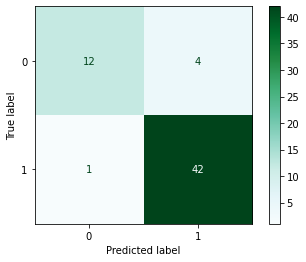

In [25]:
# Evaluation of Support Vector Model

print("Model: SVC")
print("Accuracy: ", accuracy_score(Y_test, Y_predict_svc))
print("Confusion Matrix:")
cm_svc = confusion_matrix(Y_test, Y_predict_svc)
display_svc = ConfusionMatrixDisplay(cm_svc)
display_svc.plot(cmap="BuGn")

Model: DecisionTreeClassifier
Accuracy:  0.8983050847457628
Confusion Matrix:


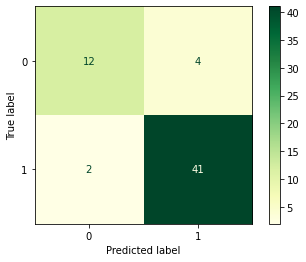

In [26]:
# Evaluation of Decision Tree Model

print("Model: DecisionTreeClassifier")
print("Accuracy: ", accuracy_score(Y_test, Y_predict_decision_tree))
print("Confusion Matrix:")
cm_decision_tree = confusion_matrix(Y_test, Y_predict_decision_tree)
display_dt = ConfusionMatrixDisplay(cm_decision_tree)
display_dt.plot(cmap="YlGn")

Model: RandomForestClassifier
Accuracy:  0.9661016949152542
Confusion Matrix:


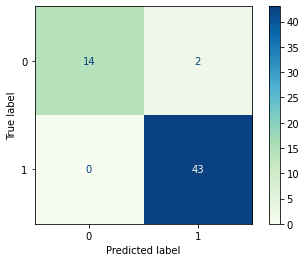

In [27]:
# Evalutaion of Random Forest Model

print("Model: RandomForestClassifier")
print("Accuracy: ", accuracy_score(Y_test, Y_predict_random_forest))
print("Confusion Matrix:")
cm_random_forest = confusion_matrix(Y_test, Y_predict_random_forest)
display_rf = ConfusionMatrixDisplay(cm_random_forest)
display_rf.plot(cmap="GnBu")

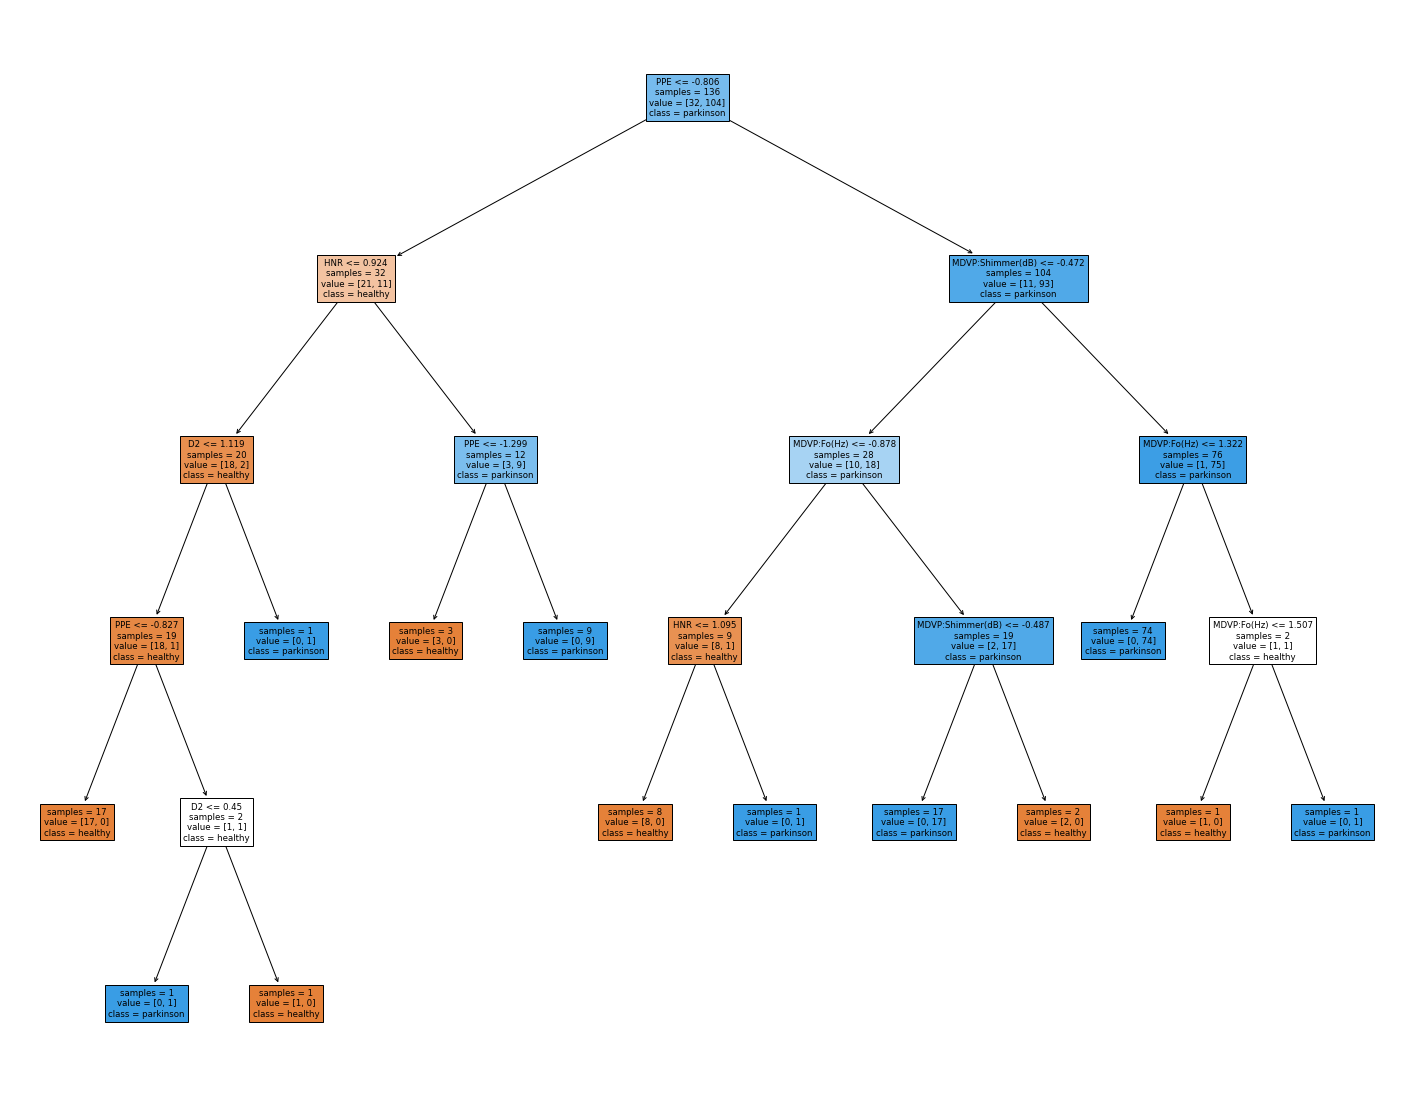

In [28]:
# Plotting Decision Tree Model

from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))
_ = plot_tree(decision_tree, feature_names = X.columns, class_names = ["healthy","parkinson"], filled=True, impurity=False)

### Saving Parkinson's Disease Detection Model

In [29]:
# Save the model to disk

import pickle

filename = 'parkinson-detection-model.h5'
pickle.dump(random_forest, open(filename, 'wb'))
print("Model saved successfully")

Model saved successfully


***
### Conclusion

We have accomplished our Main Aim of classifying healthy people and people having parkinson's diease based on the 'status' column of dataset. <br>
Firstly we imported the data, performed some Exploratory Data Analysis to gather insights about data. <br>
Then, we did Data Pre-processing that included, Feature Selection based on Pearson correlation, we separated the highly correlated features. <br>
We performed Standard Scaling on the chosen features and used them for Model Building.<br>
We chose 3 algorithms for our model building depending on our data: 
1) Support Vector Machine <br>
2) Decision Tree <br>
3) Random Forest <br>
Next, we trained separate models using these algorithms and compared the evaluation results. We observed that Random Forest algorithm outperformed out of the chosen algorithms. <br>
Lastly, we saved our final model trained using Random Forest algorithm to the disk.

### Future Enhancements

Currently, we have only developed the backend, that is our model for prediction of parkinson's disease and we have saved our final model. <br>
Future enhancements include following:
1) Creating an endpoint for the model <br>
2) Developing UI for user input to the model and displaying the model prediction

***
***